### Change Log Template for Clothing Recognition (using Multilayer Perceptron)

This notebook contains code from [Handwritten digits recognition (using Multilayer Perceptron)](achine-learning-experiments/blob/master/experiments/digits_recognition_mlp/digits_recognition_mlp.ipynb#scrollTo=bGZajcACbkkZ) on Google Col-ab

This notebook demonstrates a Multilayer Perceptron Neural Network (MLP) with four hidden layers to create a model for clothing recognition, traind and tested on the FashionMNIST dataset. The model classifies images into 10 categories of clothing items.

In this notebook we are loggin the changes that took place inclusing a new dataset:
 Here we can see the original handwritten digits dataset vs the Fashion data set:
 <p float="left">
  <img src="https://github.com/trekhleb/machine-learning-experiments/blob/master/demos/src/images/digits_recognition_cnn.png?raw=1" width="400" />
  <img src="images/dataset-cover.png" width="900" /> 
</p>



#### [1. Understanding the Algorithm](#algorithm-understanding)
- **Algorithm**
A **multilayer perceptron** is a feedforward neural network. The network we are using in this notebook has 4 layers of nodes: an input layer, 2 hidden layers and an output layer. </br>
Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. </br>
MLPs are good used to model, seperate and disgunishing non-linear data. 

- **Objective:**
  - The original notebok built a MLP model using Tensorflow to recognize handwritten digits.
  - My notebok built a MLP model using Tensorflow to recognize clothing images digits.


##### [2. Data Understanding](#data-understanding)
- **Dataset Description:**
 - The original notebook trained the CNN on MNIST data which as dataset consisiting of handwritted digits 0 - 9 in greyscale images. 
 - The original dataset has 60,000 images for training and 10,000 for testing. 

- **Changes:**
My notebook trains the model on the FashionMNIST dataset. 
 - This data set contains 60,000 training and 10,000 test images. 
 - Images are 28 x 28 greyscale 
 - Each training and test example is assigned to one of the following labels:
    - 0 T-shirt
    - 1 Trouser
    - 2 Pullover
    - 3 Dress
    - 4 Coat
    - 5 Sandal
    - 6 Shirt
    - 7 Sneaker
    - 8 Bag
    - 9 Ankle boot

This dataset was created by the same insitutuon MNIST as an update to the MNIST hand written digits dataset using it as a benchmark to validate their algorithmns. 

##### [3. Data Preparation](#3-data-preparation)
1. Gather Data: Fashion MNIST dataset loaded using TensorFlows dataset loaded.
 - This data was split into x,y for testing & training
2. Reshaped: Data was reshaped to 28px x 28px. The images were already thos format but I wanted to ensure consistancy across the board.3
3. Normalised: The images were normalised, this involves each pixel being assigned a value between 0 - 255 based on its colour. 

##### [4. Modeling](#modeling)
- **Implementation Details:**
    - **Layers:**  4 hidden layers, 1 flatten & 3 dense.
        1. Flatten: Convert the 2D array of pixels into a 1D array
        2. Dense1: Fully connected layer with ReLU activation function.
        3. Dense2: Output layer with softmax activation function.
        3. Dense3: Output layer with softmax activation function.

    - **Activation Functions:** ReLU & Softmax.
        1. ReLU activation function is used in the hidden layers to introduce non-linearity and enable the network to learn complex patterns in the data.
        2. Softmax activation function is used in the output layer to convert the raw output scores into probabilities so that we can make predictions based on probabilities.

    - **Optimizer:** Adam optimizer with a learning rate of 0.001.

    - **Loss Function:** Sparse categorical cross-entropy.

    <img src="images/model.png" width="200" />

##### [5. Evaluation](#evaluation)


**Learning Rate 0.001:**

| Epoch | Training Accuracy | Training Loss | Validation Accuracy | Validation Loss |
|-------|-------------------|---------------|---------------------|-----------------|
| 1     | 0.7171            | 0.7807        | 0.8476              | 0.4169          |
| 10    | 0.9147            | 0.2265        | 0.8976              | 0.2888          |

<p float="left">
  <img src="images/Accuracy_learning_rate=0.001.png" width="400" />
  <img src="images/Loss_learning_rate=0.001.png" width="400" /> 
  <img src="images/cm_learning_rate=0.001.png" width="400" />
</p>


**Learning Rate 0.002:**

| Epoch | Training Accuracy | Training Loss | Validation Accuracy | Validation Loss |
|-------|-------------------|---------------|---------------------|-----------------|
| 1     | 0.7484            | 0.6871        | 0.8608              | 0.3839          |
| 10    | 0.9142            | 0.2269        | 0.8942              | 0.3225          |

<p float="left">
  <img src="images/Accuracy_learning_rate=0.002.png" width="400" />
  <img src="images/Loss_learning_rate=0.002.png" width="400" /> 
  <img src="images/cm_learning_rate=0.002.png" width="400" />
</p>

**Learning Rate 0.003:**

| Epoch | Training Accuracy | Training Loss | Validation Accuracy | Validation Loss |
|-------|-------------------|---------------|---------------------|-----------------|
| 1     | 0.7484            | 0.6871        | 0.8608              | 0.3839          |
| 10    | 0.9142            | 0.2269        | 0.8942              | 0.3225          |


<p float="left">
  <img src="images/Loss_learning_rate=0.003.png" width="400" /> 
  <img src="images/Accuracy_learning_rate=0.003.png" width="400" />
  <img src="images/cm_learning_rate=0.003.png" width="400" />
</p>

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import keras

print('Python version:', platform.python_version())
print('TensorFlow version:', tf.__version__)
print('Keras version:', keras.__version__)

Python version: 3.11.8
TensorFlow version: 2.16.1
Keras version: 3.1.1


## Load the data

The **training** dataset consists of 60,000 28 x 28 greyscale images of 10 catageories of clothing.

The **test** dataset consists of 10,000 clothing images in the same form factor. 

In [32]:
# Load the Fashion MNIST dataset
fashion_mnist_dataset = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist_dataset.load_data()

In [33]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

This is displaying an image of a shoe

In [34]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,...,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,...,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,...,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,...,235,227,224,222,224,221,223,245,173,0


This matrix of numbers may be drawn as follows:

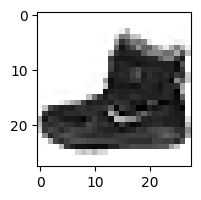

In [35]:
plt.figure(figsize=(2, 2))
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to see whsy other images of clothing our dataset contains 

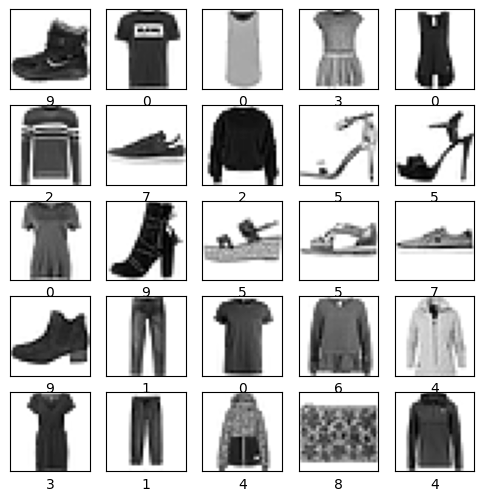

In [36]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(6,6))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [37]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [38]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.21,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.01
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.56,0.48,0.09,0.00,0.00,0.00,0.00,0.05,0.04,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.42,0.61,0.63,0.43,0.25,0.09,0.30,0.51,0.28,0.06
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.85,0.64,0.50,0.47,0.48,0.57,0.55,0.35,0.67,0.26
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.87,0.87,0.84,0.84,0.64,0.50,0.48,0.77,0.90,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.92,0.89,0.88,0.87,0.88,0.87,0.87,0.96,0.68,0.00


Let's see how the digits look like after normalization. We're expecting it to look similar to original.

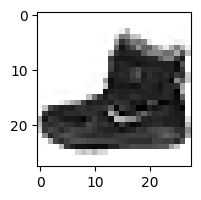

In [39]:
plt.figure(figsize=(2, 2))
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model with 4 layers:

- Layer 1: [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **Input** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In this example we will use `kernel_regularizer` parameter of the layer to control overfitting of the model. Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e. `tf.keras.layers.Dropout(0.2)`).

In [40]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

/usr/local/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Here is our model summary so far.

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

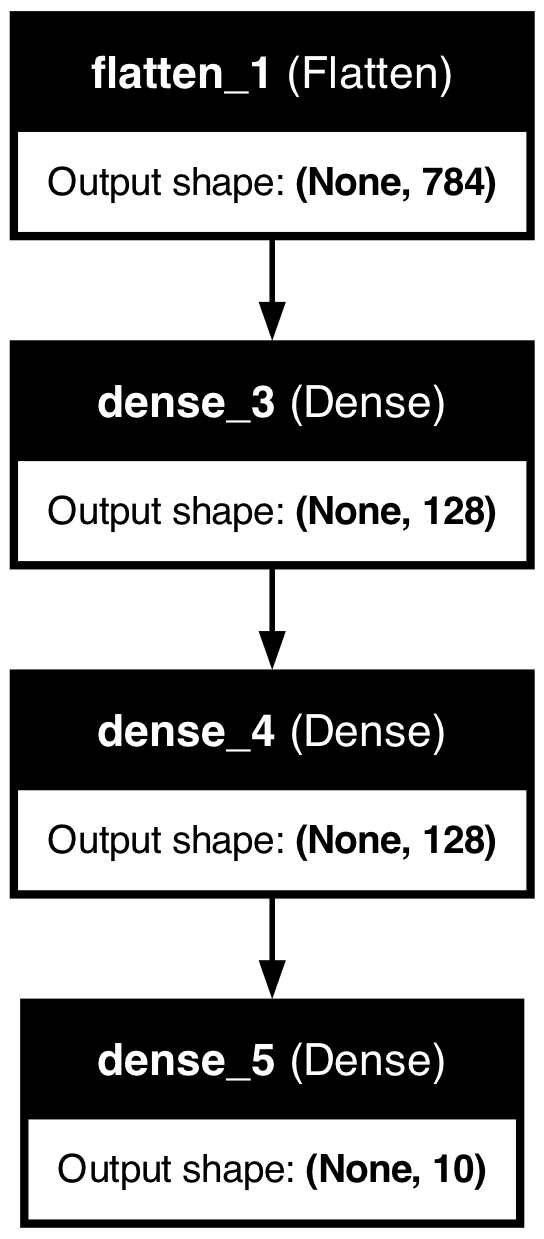

In [42]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Compile the model

In [43]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [44]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7670 - loss: 0.9181 - val_accuracy: 0.8362 - val_loss: 0.5796
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8246 - loss: 0.6005 - val_accuracy: 0.8052 - val_loss: 0.6403
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8317 - loss: 0.5742 - val_accuracy: 0.7812 - val_loss: 0.6789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8333 - loss: 0.5515 - val_accuracy: 0.8092 - val_loss: 0.6642
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8360 - loss: 0.5487 - val_accuracy: 0.8209 - val_loss: 0.5861
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8368 - loss: 0.5336 - val_accuracy: 0.8155 - val_loss: 0.5763
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8389 - loss: 0.5313 - val_accuracy: 0.8309 - val_loss: 0.5600
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8422 - loss: 0.5205 - 

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

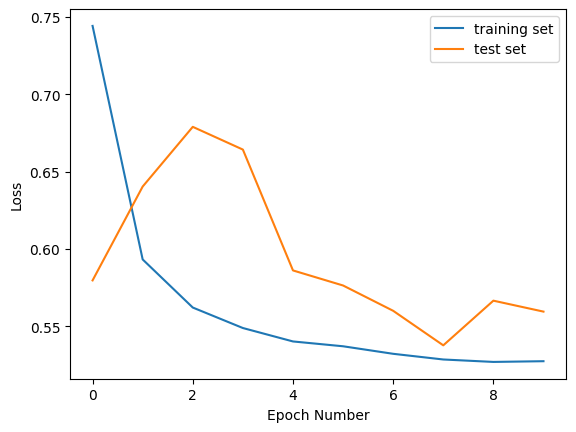

In [45]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

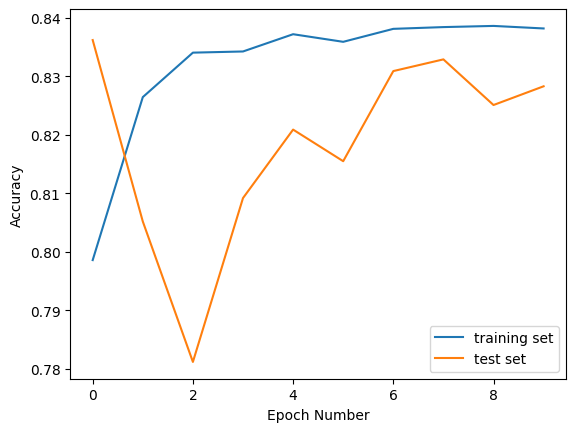

In [46]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [47]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [48]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.5169541239738464
Training accuracy:  0.8435333371162415


### Test set accuracy

In [49]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [50]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.5594497323036194
Validation accuracy:  0.8282999992370605


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model should be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [51]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [52]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [53]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step


In [54]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [55]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.049222e-04,1.578224e-04,9.634045e-06,2.531457e-05,9.487401e-05,1.805720e-01,2.245961e-05,1.990023e-01,2.820747e-03,6.171899e-01
1,3.087643e-03,3.445662e-06,9.727163e-01,3.166341e-04,4.221438e-03,1.765115e-08,1.954799e-02,2.269628e-15,1.064983e-04,1.188238e-08
2,5.028304e-05,9.998758e-01,1.211682e-06,6.781362e-05,1.456628e-06,4.144938e-08,2.881432e-06,3.524138e-11,6.414775e-08,5.177831e-07
3,3.002473e-05,9.997952e-01,1.050535e-06,1.715261e-04,6.672061e-07,5.020070e-09,1.418513e-06,1.335762e-12,6.239721e-08,9.971121e-08
4,1.931627e-01,1.015362e-03,1.798505e-01,6.123506e-02,1.586816e-02,3.417260e-04,5.351097e-01,1.153488e-06,1.332569e-02,8.991182e-05
...,...,...,...,...,...,...,...,...,...,...
9995,7.970309e-08,2.074136e-07,5.583601e-10,8.031898e-09,8.221839e-08,1.604839e-03,5.469094e-09,5.900868e-03,1.784354e-06,9.924922e-01
9996,2.958055e-04,9.977465e-01,4.957541e-05,1.857409e-03,1.581711e-05,8.918469e-07,2.734740e-05,1.007991e-09,3.229780e-06,3.566166e-06
9997,7.343990e-03,4.880620e-04,3.054970e-03,1.005065e-02,9.485402e-03,9.742288e-05,3.486225e-03,5.862302e-07,9.659912e-01,1.590948e-06
9998,1.876826e-04,9.984683e-01,1.122595e-06,1.258148e-03,6.893604e-06,7.978145e-07,6.343634e-06,1.842449e-07,5.204471e-05,1.843931e-05


In [56]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


So our model is predicting that the first example from the test set is `9`.

Label 9 = Ankle boot

In [57]:
print(predictions[0])

9


Let's print the first image from a test set to see if model's prediction is correct.

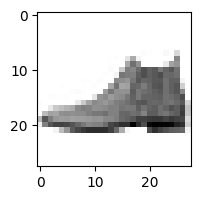

In [58]:
plt.figure(figsize=(2, 2))
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully the image of an ankle boot `9`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

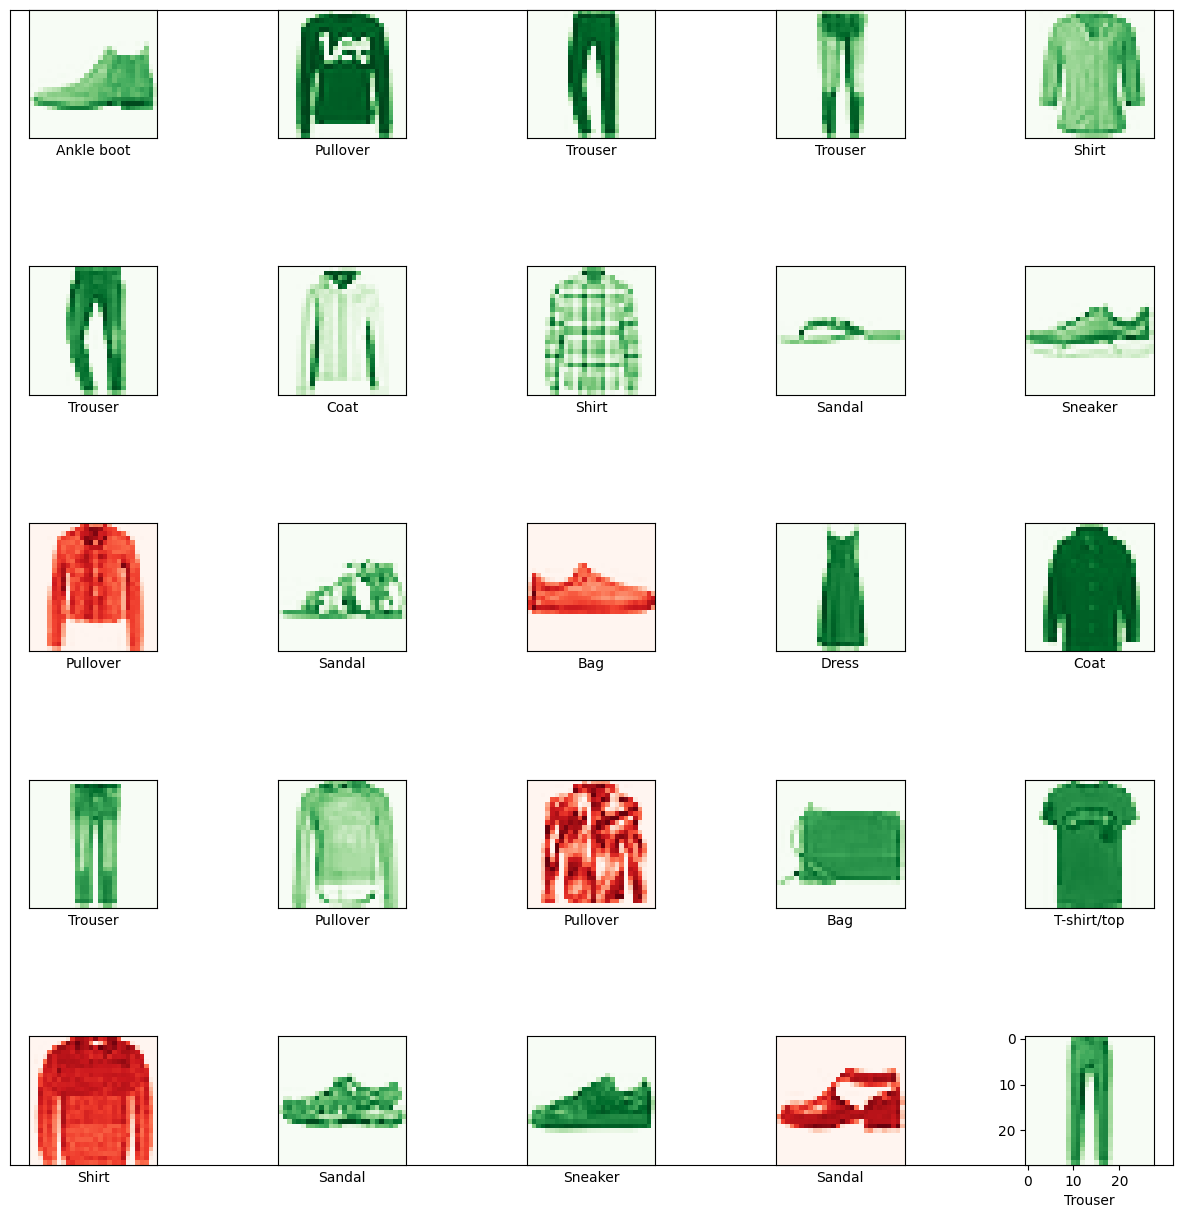

In [59]:
# Define class names corresponding to each category
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot the images with predicted class names
plt.figure(figsize=(15, 15))
for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    predicted_class = class_names[predicted_label]
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_class)  # Use predicted class name instead of label

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()


## Plotting a confusion matrix

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) shows what images are recognized well by the model and what items the model usually confuses to recognize correctly. You may see that the model performs really well but confuses some items such as a Tshirt & top or a coat and a top 

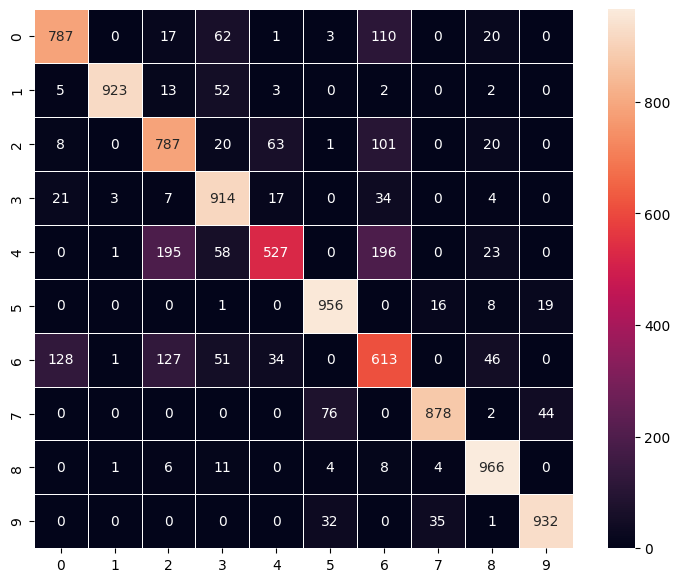

In [60]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

learning_rate=0.001
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7711 - loss: 1.0073 - val_accuracy: 0.8092 - val_loss: 0.6808
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8419 - loss: 0.5756 - val_accuracy: 0.8433 - val_loss: 0.5475
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8496 - loss: 0.5229 - val_accuracy: 0.8378 - val_loss: 0.5550
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8525 - loss: 0.5011 - val_accuracy: 0.8492 - val_loss: 0.5157
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8578 - loss: 0.4823 - val_accuracy: 0.8450 - val_loss: 0.5116
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8624 - loss: 0.4635 - val_accuracy: 0.8419 - val_loss: 0.5099
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8644 - loss: 0.4560 - val_accuracy: 0.8540 - val_loss: 0.4825
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8644 - loss: 0.4456 - val_accuracy: 0.8476 - val_loss: 0.4874
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8657 - loss: 0.4447 - val_accuracy: 0.8447 - val_loss: 0.5060
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8690 - loss: 0.4365 - val_accuracy: 0.8476 - val_loss: 0.4879

learning_rate=0.002
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7713 - loss: 0.9208 - val_accuracy: 0.8405 - val_loss: 0.5840
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8378 - loss: 0.5725 - val_accuracy: 0.8405 - val_loss: 0.5485
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8399 - loss: 0.5437 - val_accuracy: 0.8489 - val_loss: 0.5307
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8459 - loss: 0.5186 - val_accuracy: 0.8315 - val_loss: 0.5651
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8490 - loss: 0.5053 - val_accuracy: 0.8444 - val_loss: 0.5187
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8499 - loss: 0.4981 - val_accuracy: 0.8460 - val_loss: 0.5316
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8464 - loss: 0.5053 - val_accuracy: 0.8458 - val_loss: 0.5111
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8517 - loss: 0.4914 - val_accuracy: 0.8363 - val_loss: 0.5306
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8513 - loss: 0.4930 - val_accuracy: 0.8423 - val_loss: 0.5141
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8536 - loss: 0.4842 - val_accuracy: 0.8396 - val_loss: 0.5317

learning_rate=0.003
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7670 - loss: 0.9181 - val_accuracy: 0.8362 - val_loss: 0.5796
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8246 - loss: 0.6005 - val_accuracy: 0.8052 - val_loss: 0.6403
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8317 - loss: 0.5742 - val_accuracy: 0.7812 - val_loss: 0.6789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8333 - loss: 0.5515 - val_accuracy: 0.8092 - val_loss: 0.6642
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8360 - loss: 0.5487 - val_accuracy: 0.8209 - val_loss: 0.5861
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8368 - loss: 0.5336 - val_accuracy: 0.8155 - val_loss: 0.5763
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8389 - loss: 0.5313 - val_accuracy: 0.8309 - val_loss: 0.5600
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8422 - loss: 0.5205 - val_accuracy: 0.8329 - val_loss: 0.5377
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8415 - loss: 0.5233 - val_accuracy: 0.8251 - val_loss: 0.5665
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8405 - loss: 0.5217 - val_accuracy: 0.8283 - val_loss: 0.5594